In [1]:
import os, sys # import functions from Function_lists_for_Transit_Searching.py
import lightkurve as lk
import numpy as np
import fnmatch, os

In [2]:
code_path = "/Users/madelinejmg/Desktop/research 2024/data challenge 2/"

sys.path.append(code_path + 'Function_lists_for_Transit_Searching.py')

In [3]:
from Function_lists_for_Transit_Searching import (predicted_transit_depth, 
phasefold_proper, convert_window_size_in_days_to_points, detrend, 
transit_searching_bls, transit_searching_tls, extract_TPF_light_curves, collecting_transits_results)

In [4]:
# Reading target list
target_path = "/Users/madelinejmg/Desktop/research 2024/data challenge 2/Known_Mdwarf_planets_for_Madeline.csv"

In [5]:
import pandas as pd

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [7]:
targets = pd.read_csv(target_path)

In [8]:
print(len(targets))

49


In [9]:
targets.tail(4)

,pl_name,pl_letter,hostname,hd_name,hip_name,TIC ID,gaia_id,default_flag,pl_refname,sy_refname,disc_pubdate,disc_year,discoverymethod,disc_locale,disc_facility,disc_instrument,disc_telescope,disc_refname,ra,rastr,dec,decstr,glon,glat,elon,elat,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbperstr,pl_orblpererr1,pl_orblper,pl_orblpererr2,pl_orblperlim,pl_orblperstr,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxstr,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbinclstr,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orbtperstr,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenstr,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_eqtstr,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_occdepstr,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_insolstr,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_densstr,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandepstr,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tranmidstr,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,pl_trandurstr,sy_kmagstr,sy_umag,sy_umagerr1,sy_umagerr2,sy_umagstr,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_rmagstr,sy_imag,sy_imagerr1,sy_imagerr2,sy_imagstr,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_zmagstr,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w1magstr,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w2magstr,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w3magstr,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_w4magstr,sy_gmag,sy_gmagerr1,sy_gmagerr2,sy_gmagstr,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_gaiamagstr,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_tmagstr,pl_controv_flag,pl_tsystemref,st_metratio,st_spectype,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,sy_kepmagstr,st_rotp,st_rotperr1,st_rotperr2,st_rotplim,st_rotpstr,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqlim,pl_projobliqstr,x,y,z,htm20,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_rvampstr,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_radjstr,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radestr,pl_ratror,pl_ratrorerr1,pl_ratrorerr2,pl_ratrorlim,pl_ratrorstr,pl_ratdor,pl_trueobliq,pl_trueobliqerr1,pl_trueobliqerr2,pl_trueobliqlim,pl_trueobliqstr,sy_icmag,sy_icmagerr1,sy_icmagerr2,sy_icmagstr,rowupdate,pl_pubdate,st_refname,releasedate,dkin_flag,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,pl_ratdorstr,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_impparstr,pl_cmassj,pl_cmassjerr1,pl_cmassjerr2,pl_cmassjlim,pl_cmassjstr,pl_cmasse,pl_cmasseerr1,pl_cmasseerr2,pl_cmasselim,pl_cmassestr,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_massjstr,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_massestr,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassjstr,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassestr,pl_bmassprov,pl_msinij,pl_msinijerr1,pl_msinijerr2,pl_msinijlim,pl_msinijstr,pl_msinie,pl_msinieerr1,pl_msinieerr2,pl_msinielim,pl_msiniestr,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffstr,st_met,st_meterr1,st_meterr2,st_metlim,st_metstr,st_radv,st_radverr1,st_radverr2,st_radvlim,st_radvstr,st_vsin,st_vsinerr1,st_vsinerr2,st_vsinlim,st_vsinstr,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_lumstr,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_loggstr,st_age,st_ageerr1,st_ageerr2,st_agelim,st_agestr,st_mass,st_masserr1,st_masserr2,st_masslim,st_massstr,st_dens,st_denserr1,st_denserr2,st_denslim,st_densstr,st_rad,st_raderr1,st_raderr2,st_radlim,st_radstr,ttv_flag,ptv_flag,tran_flag,rv_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,pul_flag,soltype,sy_snum,sy_pnum,sy_mnum,cb_flag,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_nnotes,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmstr,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmrastr,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_pmdecstr,sy_plx,sy_plxerr1,sy_plxerr2,sy_plxstr,sy_dist,sy_disterr1,sy_disterr2,sy_diststr,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_bmagstr,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_vmagstr,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_jmagstr,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_hmagstr,sy_

## Testing light curve extracting function

In [10]:
import matplotlib.pyplot as plt

In [11]:
# star_name = 'TIC 100100827' # Jupiter-sized planet (WASP-18b)
# save_path = os.getcwd() + '/'
# use_SPOC = True
# do_multisector = False
# extract_TPF_light_curves(star_name = star_name, download_path = save_path, 
#                               save_path = save_path, use_SPOC = use_SPOC, 
#                          do_multisector = do_multisector)

## Reading in each target from the target list

In [12]:
# for x in range(49): #len(targets)):
#     ID = targets['TIC ID'][x]
#     star_name = ('TIC ' + str(ID))
#     R_star = targets['st_rad'][x]
#     M_star = targets['st_mass'][x] # NOT NEEDED FOR BLS, ONLY FOR TLS
    
#     from transitleastsquares import catalog_info
    
#     # Stellar parameters 
#     ab, mass, mass_min, mass_max, radius, radius_min, radius_max = catalog_info(TIC_ID = int(ID))
    
#     print('STELLAR PARAMS: R_star', R_star,'M_star', M_star)

#     if np.isnan(R_star) == True:
#         print('R_star for', star_name, 'is', radius)
#         R_star = radius

#     if np.isnan(M_star) == True:
#         print('M_star for', star_name, 'is', mass)
#         if (np.isnan(mass) == True) & (np.isnan(radius) != True):
#             mass = radius # THIS IS AN ASSUMPTION FOR SMALL STARS
#             M_star = mass
#         else:
#             print('M_star for', star_name, 'is', mass)
#             M_star = mass
#     print('STELLAR PARAMS: R_star', R_star, 'M_star', M_star,
#           ab, mass, mass_min, mass_max, radius, radius_min, radius_max)                
    
    
#     # ab - the quadratic limb darkening coefficients
#     limb_darkening_coefficients = [ab[0], ab[1]]
    

#     save_path = os.getcwd() + '/'
#     use_SPOC = True
#     do_multisector = False
#     extract_TPF_light_curves(star_name = star_name, download_path = save_path, 
#                                   save_path = save_path, use_SPOC = use_SPOC, 
#                              do_multisector = do_multisector)
    
#     lc = pd.read_csv(save_path + star_name + '_lc.csv')
#     lc = lk.LightCurve(time = lc.time, flux = lc.flux, flux_err = lc.flux_err)
#     print('TIC ' + str(ID), R_star, M_star) # light curve showing
     
#     # Detrending
#     window_length = 6/24
#     filter_type = 'Wotan'
#     return_trend = True
    
#     newlc, trend_lc = detrend(lc, window_length, filter_type, return_trend = return_trend)
    
#     # Search for BLS
#     period_minimum = 1 # in days
#     period_maximum = 9 # in days
#     n_periods = 1000 # number of trial periods
#     filename = star_name + '_BLS.csv'
#     frequency_factor = 500

#     period, epoch, duration, depth = transit_searching_bls(newlc, trend_lc, period_minimum = period_minimum, 
#                                                            period_maximum = period_maximum, n_periods = n_periods,
#                                                            savepath = save_path, filename = filename, 
#                                                            frequency_factor = frequency_factor, 
#                                                            injected_RP_in_earth_radii = None, R_star = R_star)
    
#     # Search for TLS
#     use_threads = 1
    
#     period, epoch, duration, depth = transit_searching_tls(newlc, trend_lc, filename = filename, 
#                                                            use_threads = use_threads,
#                                                            oversampling_factor = 9, duration_grid_step = 1.1,
#                                                            savepath = save_path, R_star = R_star, M_star = M_star,
#                                                            limb_darkening_coefficients = limb_darkening_coefficients)

STELLAR PARAMS: R_star 0.41 M_star nan
M_star for TIC 429358906 is 0.398817
STELLAR PARAMS: R_star 0.41 M_star 0.398817 (0.1529, 0.4604) 0.398817 0.0204054 0.0204054 0.406516 0.0122887 0.0122887


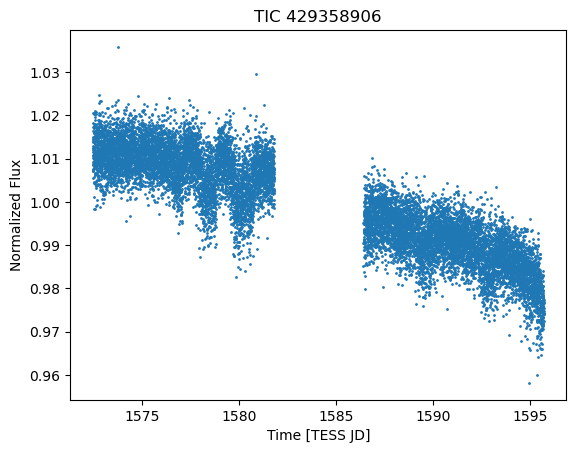

TIC 429358906 0.41 0.398817


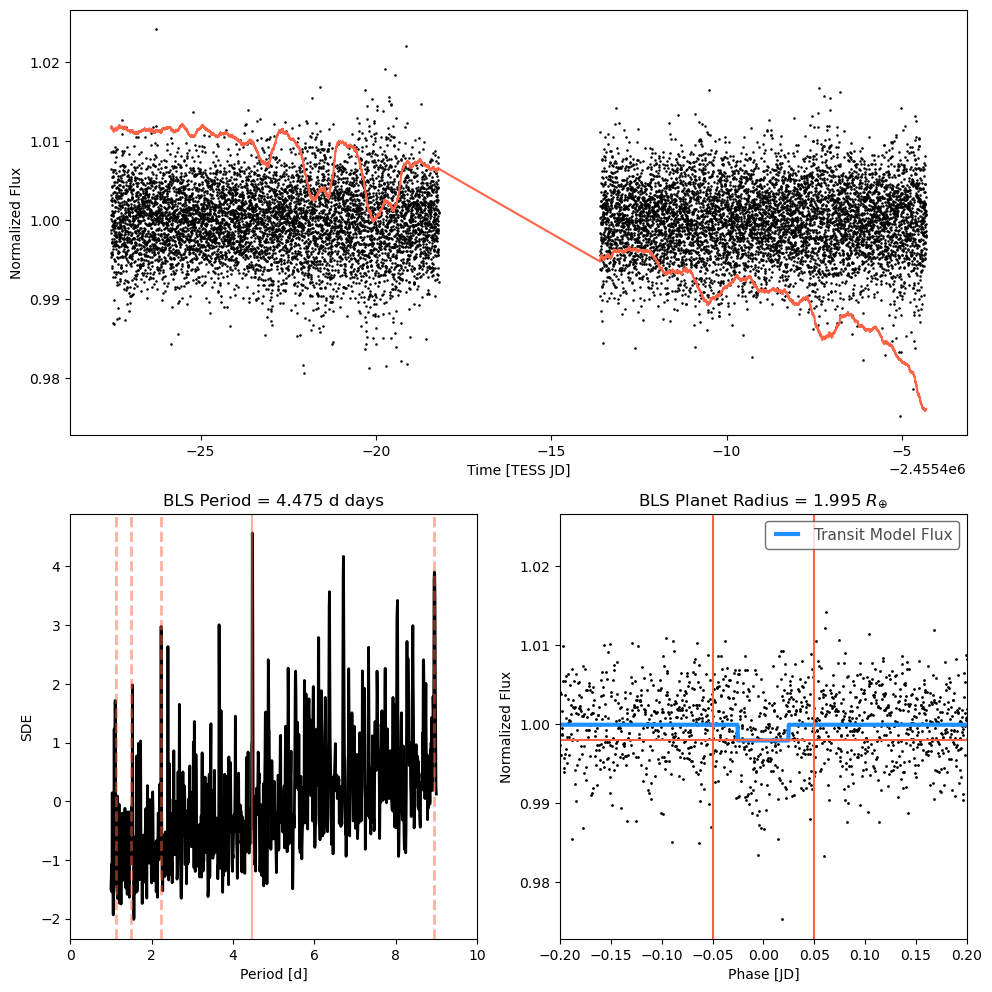

star_name: TIC 429358906
STELLAR PARAMS: R_star 0.54 M_star nan
M_star for TIC 151825527 is 0.539888
STELLAR PARAMS: R_star 0.54 M_star 0.539888 (0.2315, 0.3808) 0.539888 0.0203613 0.0203613 0.544068 0.016274 0.016274


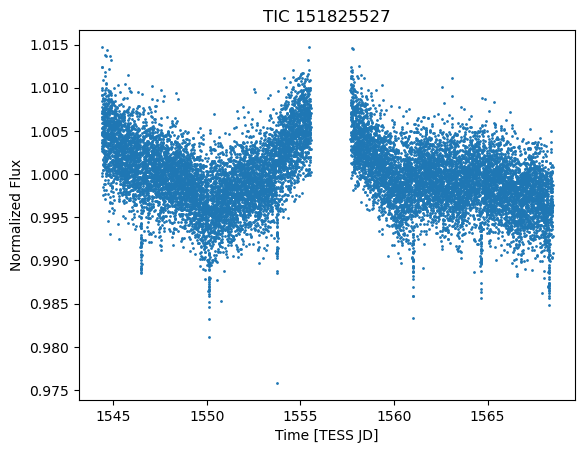

TIC 151825527 0.54 0.539888


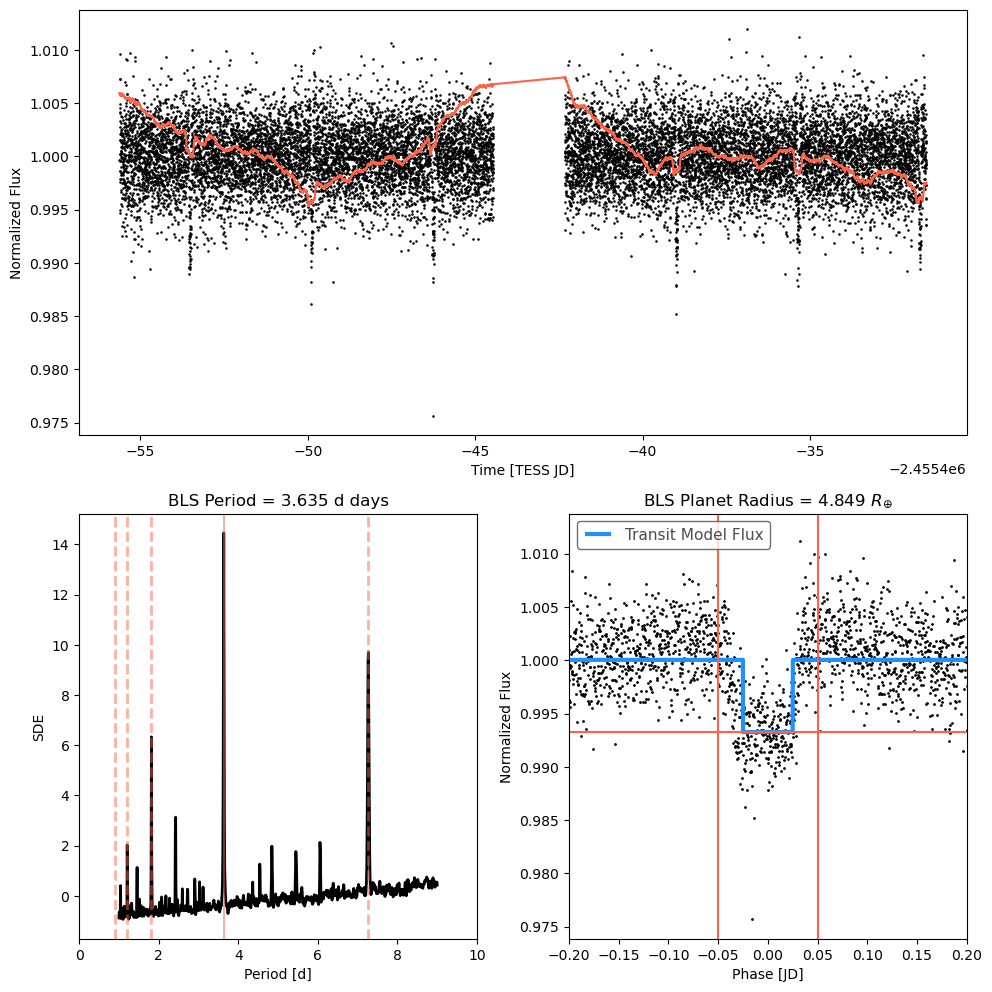

star_name: TIC 151825527
STELLAR PARAMS: R_star 0.43 M_star 0.53
STELLAR PARAMS: R_star 0.43 M_star 0.53 (0.1555, 0.4459) 0.422643 0.0203147 0.0203147 0.427953 0.0127854 0.0127854


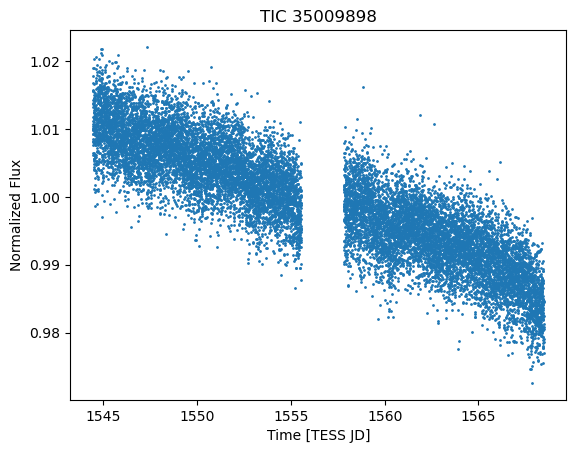

TIC 35009898 0.43 0.53


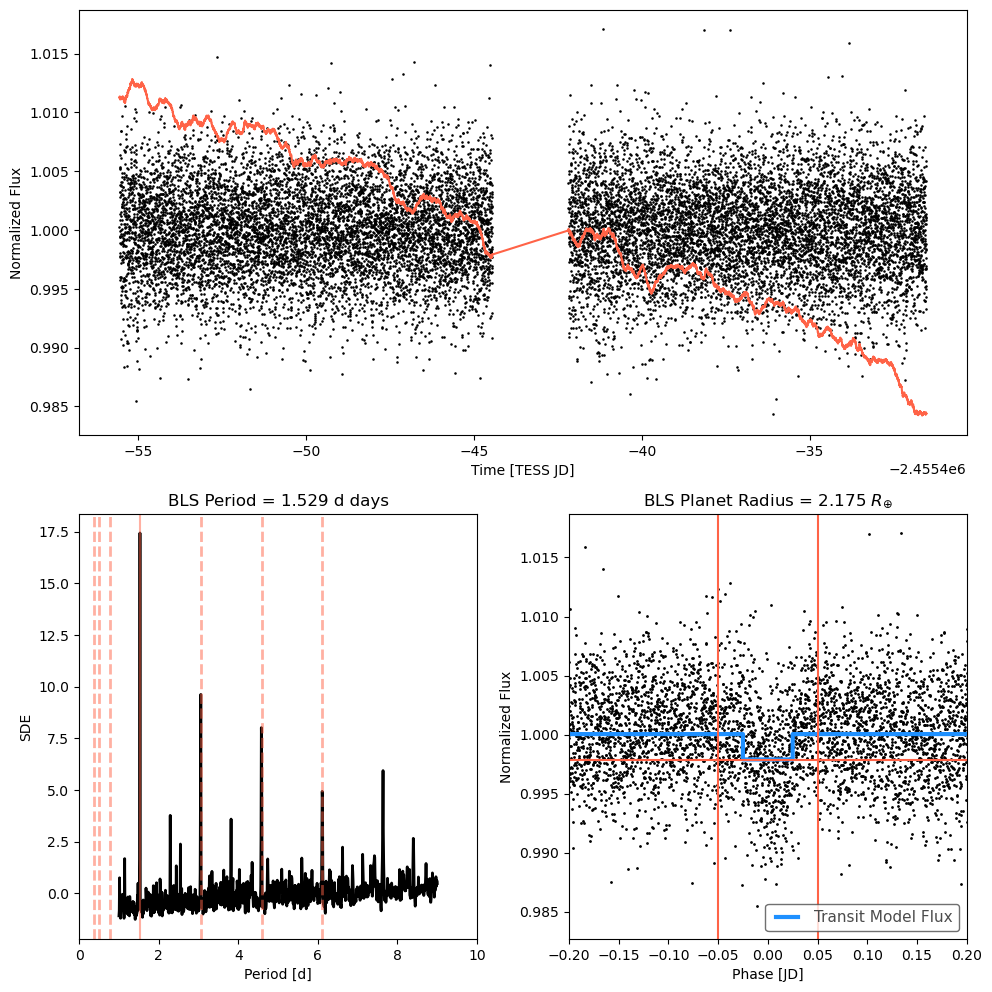

star_name: TIC 35009898


In [33]:
for x in range(3):  # len(targets)):
    try:
        ID = targets['TIC ID'][x]
        star_name = 'TIC ' + str(ID)
        R_star = targets['st_rad'][x]
        M_star = targets['st_mass'][x]  # NOT NEEDED FOR BLS, ONLY FOR TLS

        from transitleastsquares import catalog_info
        
        # Stellar parameters
        ab, mass, mass_min, mass_max, radius, radius_min, radius_max = catalog_info(TIC_ID = int(ID))

        print('STELLAR PARAMS: R_star', R_star, 'M_star', M_star)

        if np.isnan(R_star):
            print('R_star for', star_name, 'is', radius)
            R_star = radius

        if np.isnan(M_star):
            print('M_star for', star_name, 'is', mass)
            if np.isnan(mass) and not np.isnan(radius):
                mass = radius  # THIS IS AN ASSUMPTION FOR SMALL STARS
            M_star = mass
        print('STELLAR PARAMS: R_star', R_star, 'M_star', M_star,
              ab, mass, mass_min, mass_max, radius, radius_min, radius_max)

        # ab - the quadratic limb darkening coefficients
        limb_darkening_coefficients = [ab[0], ab[1]]

        save_path = os.getcwd() + '/test/'
        use_SPOC = True
        do_multisector = False
        extract_TPF_light_curves(star_name = star_name, download_path = save_path,
                                 save_path = save_path, use_SPOC = use_SPOC,
                                 do_multisector = do_multisector)

        lc = pd.read_csv(save_path + star_name + '_lc.csv')
        lc = lk.LightCurve(time = lc.time, flux = lc.flux, flux_err = lc.flux_err)
        print('TIC ' + str(ID), R_star, M_star)  # light curve showing

        # Detrending
        window_length = 6 / 24
        filter_type = 'Wotan'
        return_trend = True

        newlc, trend_lc = detrend(lc, window_length, filter_type, return_trend=return_trend)

        # Search for BLS
        period_minimum = 1  # in days
        period_maximum = 9  # in days
        n_periods = 1000  # number of trial periods
        filename_BLS = star_name + '_BLS.csv'
        #print(filename_BLS)
        frequency_factor = 500

        period, epoch, duration, depth = transit_searching_bls(newlc, trend_lc, period_minimum = period_minimum,
                                                               period_maximum = period_maximum, n_periods = n_periods,
                                                               savepath = save_path, filename = filename_BLS,
                                                               frequency_factor = frequency_factor,
                                                               injected_RP_in_earth_radii = None, R_star = R_star)

#         # Search for TLS
#         use_threads = 2
#         filename_TLS = star_name + '_TLS.csv'

#         period, epoch, duration, depth = transit_searching_tls(newlc, trend_lc, filename = filename_TLS,
#                                                                use_threads = use_threads,
#                                                                oversampling_factor = 9, duration_grid_step = 1.1,
#                                                                savepath = save_path, R_star = R_star, M_star = M_star,
#                                                                limb_darkening_coefficients = limb_darkening_coefficients)

    except TypeError as e:
        ID = targets['TIC ID'][x]
        star_name = 'TIC ' + str(ID)
        print(e)
        # Create a DataFrame with NaN values
        data = {'Period': [np.nan], 'Epoch': [np.nan], 'Duration': [np.nan], 
                'Depth': [np.nan], 'Star name':[star_name]}
        df = pd.DataFrame(data)
        
        # Save the DataFrame with the same BLS/TLS naming convention
        df.to_csv(save_path + star_name + '_BLS.csv', index = False)
        df.to_csv(save_path + star_name + '_TLS.csv', index = False)

In [14]:
print(radius, R_star, M_star, mass)

print(filename_BLS,filename_BLS[:-8])

0.544068 0.54 0.539888 0.539888
TIC 151825527_BLS.csv TIC 151825527


## Last challenge: Collect all of our BLS/TLS, periods, and planet radii (check last notebook)

In [41]:
# Extracting BLS
def extracting_transit_results(savepath, filestring):
    
    import fnmatch, os, glob
    
    results = fnmatch.filter(glob.glob(savepath + '*'), '*' + filestring)
    
    print(len(results))

    # Combine all the BLS/TLS results
    for i in range(len(results)):
        if i < 1:
            all_dfs = pd.read_csv(results[i])
        else:
            all_dfs = pd.concat([all_dfs, pd.read_csv(results[i])])
    
    # Unnamed columns are removed
    all_dfs = all_dfs.loc[:, ~all_dfs.columns.str.contains('^Unnamed')].reset_index(drop = True) 
    
    return results, all_dfs    

bls_results, bls_all_dfs = extracting_transit_results(savepath = os.getcwd() + '/test/', 
                                         filestring = '*_BLS.csv')
print(bls_results)
bls_all_dfs # scrollable table in jupyter

3
['/Users/madelinejmg/Desktop/research 2024/data challenge 2/test/TIC 35009898_BLS.csv', '/Users/madelinejmg/Desktop/research 2024/data challenge 2/test/TIC 151825527_BLS.csv', '/Users/madelinejmg/Desktop/research 2024/data challenge 2/test/TIC 429358906_BLS.csv']


,Period,Epoch,Duration,Depth,Radius,Star name
0,1.528529,1544.952321,0.05,0.002151,2.175082,TIC 35009898
1,3.634635,1546.480920,0.05,0.006777,4.848791,TIC 151825527
2,4.475475,1572.548378,0.05,0.001990,1.995030,TIC 429358906


In [90]:
def extracting_transit_results_version2(savepath, filestring, targets):
    
    for x in range(len(targets)):
        ID = targets['TIC ID'][x]
    
        import fnmatch, os, glob

        results = fnmatch.filter(glob.glob(savepath + '*'), '*'+ str(ID) + filestring)

        print(x,ID,len(results))
        
        all_dfs=[]
        #print(len(all_dfs))
        if len(results)==1:
            print('TIC',ID,'has data!')
            df = pd.read_csv(results[0])
            # Combine all the BLS/TLS results we have measurements for
            all_dfs=np.append(all_dfs, df)
            #print(len(all_dfs))
        if len(results)==0:
            print('TIC',ID,'no data!')
            # if we don't have measurements, append a blank dataframe
            blank_df = pd.DataFrame({'Period': [np.nan], 'Epoch': [np.nan], 'Duration': [np.nan], 
                                     'Depth': [np.nan], 'Star name':[star_name]})
            all_dfs=np.append(all_dfs, blank_df)
            #print(len(all_dfs))

    # concatenate appended results
    print(' ')
    print(len(all_dfs),type(all_dfs),all_dfs.tolist())
    all_dfs = pd.concat(all_dfs.tolist())
    
    # Unnamed columns are removed
    all_dfs = all_dfs.loc[:, ~all_dfs.columns.str.contains('^Unnamed')].reset_index(drop = True) 
    
    return all_dfs    

In [91]:
extracting_transit_results_version2(savepath = os.getcwd() + '/test/', 
                                    filestring = '*_BLS.csv', 
                                    targets=targets)

0 429358906 1
TIC 429358906 has data!
1 151825527 1
TIC 151825527 has data!
2 35009898 1
TIC 35009898 has data!
3 296739893 0
TIC 296739893 no data!
4 328081248 0
TIC 328081248 no data!
5 407591297 0
TIC 407591297 no data!
6 419411415 0
TIC 419411415 no data!
7 335590096 0
TIC 335590096 no data!
8 271169413 0
TIC 271169413 no data!
9 126606859 0
TIC 126606859 no data!
10 22233480 0
TIC 22233480 no data!
11 354944123 0
TIC 354944123 no data!
12 394357918 0
TIC 394357918 no data!
13 86263325 0
TIC 86263325 no data!
14 458419328 0
TIC 458419328 no data!
15 243641947 0
TIC 243641947 no data!
16 439456714 0
TIC 439456714 no data!
17 118327550 0
TIC 118327550 no data!
18 212957629 0
TIC 212957629 no data!
19 336128819 0
TIC 336128819 no data!
20 389900760 0
TIC 389900760 no data!
21 142748283 0
TIC 142748283 no data!
22 417931300 0
TIC 417931300 no data!
23 368287008 0
TIC 368287008 no data!
24 233602827 0
TIC 233602827 no data!
25 470381900 0
TIC 470381900 no data!
26 422756130 0
TIC 422756

TypeError: cannot concatenate object of type '<class 'float'>'; only Series and DataFrame objs are valid

In [38]:
# # Combine all the bls results
# for i in range(len(bls_results)):
#     if i < 1:
#         all_dfs = pd.read_csv(bls_results[i])
#     else:
#         all_dfs = pd.concat([all_dfs, pd.read_csv(bls_results[i])])

# all_dfs = all_dfs.loc[:, ~all_dfs.columns.str.contains('^Unnamed')] # Unnamed columns are removed

# all_dfs # PRINTING TABLE

,Period,Epoch,Duration,Depth,Radius,Star name
0,1.528529,1544.952321,0.05,0.002151,2.175082,TIC 35009898
0,3.634635,1546.480920,0.05,0.006777,4.848791,TIC 151825527
0,4.475475,1572.548378,0.05,0.001990,1.995030,TIC 429358906


In [26]:
df0 = pd.read_csv(bls_results[0])

In [27]:
df1 = pd.read_csv(bls_results[1])

In [28]:
print(bls_results[1])

/Users/madelinejmg/Desktop/research 2024/data challenge 2/test/TIC 429358906_BLS.csv


In [29]:
# Combining data frames
pd.concat([df0, df1]).reset_index(drop = True)

,Unnamed: 0,Period,Epoch,Duration,Depth,Radius,Star name
0,0,3.634635,1546.480920,0.05,0.006777,4.848791,TIC 151825527
1,0,4.475475,1572.548378,0.05,0.001990,1.995030,TIC 429358906


In [20]:
# Extracting TLS
tls_results = extracting_transit_results(savepath = os.getcwd() + '/', 
                                         filestring = '*_TLS.csv')

0


## Produce the three figures below within three functions

## 1. Catalog periods on the x-axis, and catalog planet radius on the y-axis

Compare our TLS and BLS results of orbital periods and planet radius

In [ ]:
output_path = "/Users/madelinejmg/Desktop/research 2024/data challenge 2/catalogs.png"

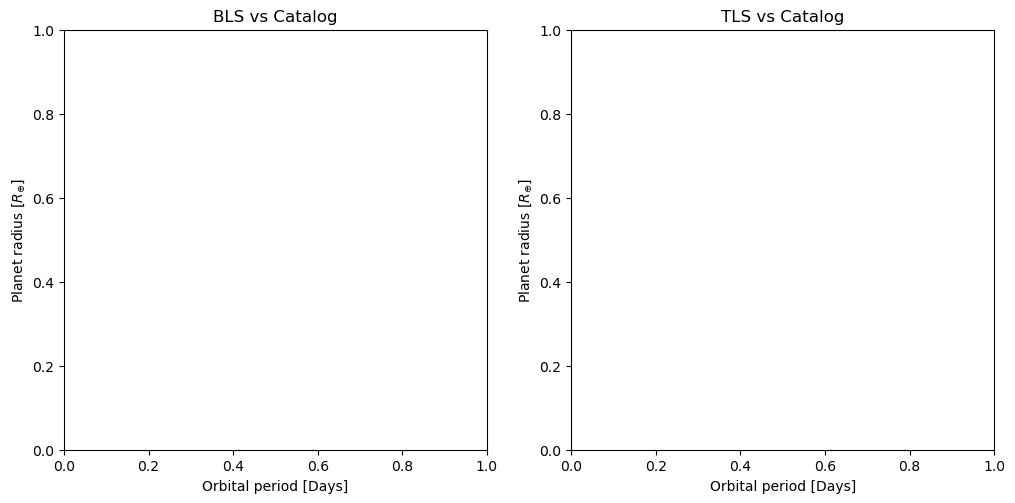

In [21]:
def catalog_vs_measured_for_BLS_and_TLS1(targets, BLS_alldfs, TLS_alldfs, output_path, filename):
    '''
    
    
    '''
    fig = plt.figure(figsize = (12, 12))

    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)

    ax1.set_title('BLS vs Catalog')
    ax2.set_title('TLS vs Catalog')

    # TLS values
    # Catalog
    ax1.scatter(targets['pl_orbper'], targets['pl_rade']) # place y-TLS/BLS values (two different plots)
    
    # Measured
    ax1.scatter(BLS_alldfs['Period'], BLS_alldfs['Radius'])
    
    ax1.set_xlabel('Orbital period [Days]')
    ax1.set_ylabel('Planet radius [$R_{\oplus}$]')

    # BLS values
    # Catalog
    ax2.scatter(targets['pl_orbper'], targets['pl_rade']) # place y-TLS/BLS values (two different plots)
    
    # Measured
    ax1.scatter(TLS_alldfs['Period'], TLS_alldfs['Radius'])
    
    ax2.set_xlabel('Orbital period [Days]')
    ax2.set_ylabel('Planet radius [$R_{\oplus}$]') # in units of Earth radii 

    plt.savefig(output_path + filename, dpi = 300, bbox_inches = 'tight')

    plt.show();

## 2. Catalog periods on the x-axis, and our measured periods from TLS and BLS on the y-axis

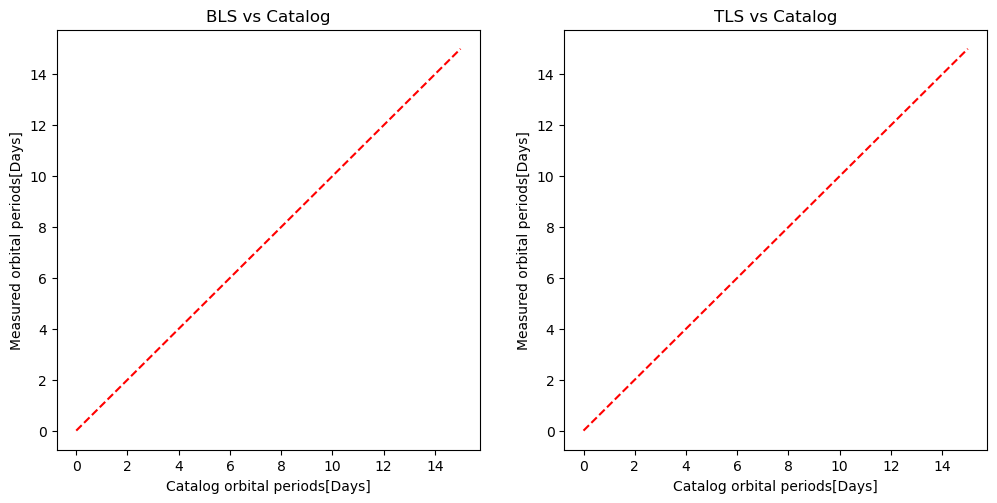

In [22]:
def catalog_vs_measured_BLS_and_TLS_2(targets, BLS_alldfs, TLS_alldfs, output_path, filename):
    '''
    
    
    '''
    fig = plt.figure(figsize = (12, 12))

    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)

    ax1.set_title('BLS vs Catalog')
    ax2.set_title('TLS vs Catalog')

    # BLS values
    # Catalog
    ax1.scatter(targets['pl_orbper'], BLS_alldfs['Period']) # place TLS/BLS values (two different plots)
    ax1.set_xlabel('Catalog orbital periods[Days]')
    ax1.set_ylabel('Measured orbital periods[Days]')

    # TLS values
    #Catalog
    ax2.scatter(targets['pl_orbper'], BLS_alldfs['Period']) # place TLS/BLS values (two different plots)
    
    ax2.set_xlabel('Catalog orbital periods[Days]')
    ax2.set_ylabel('Measured orbital periods[Days]') # We measured the BLS/TLS values

    ax1.plot(np.linspace(0, 15, 10), np.linspace(0, 15, 10), color = 'r', linestyle = '--')
    ax2.plot(np.linspace(0, 15, 10), np.linspace(0, 15, 10), color = 'r', linestyle = '--')

    plt.savefig(output_path + filename, dpi = 300, bbox_inches = 'tight')
    
    plt.show();

## 3. Catalog planet radius on the x-axis, and our measured planet radius from TLS and BLS on the y-axis

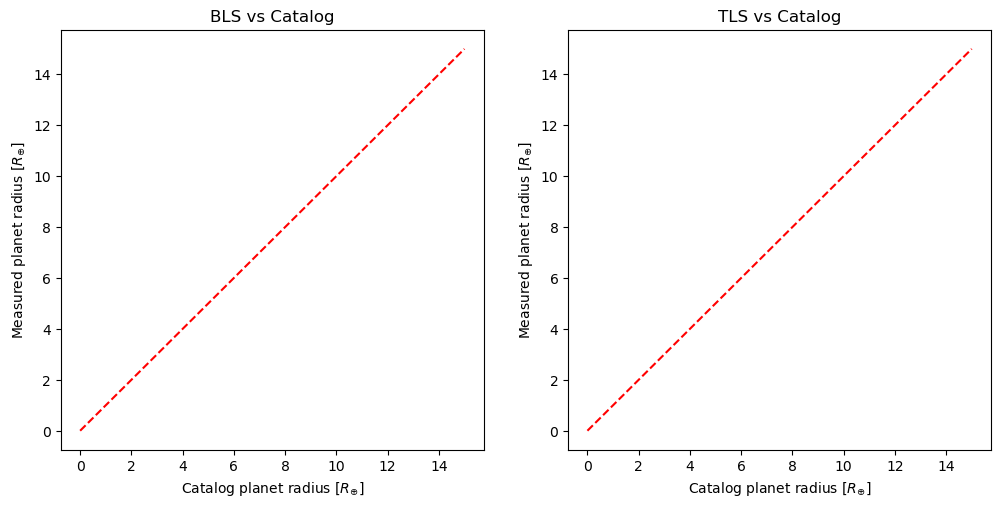

In [23]:
def catalog_vs_measured_for_BLS_and_TLS3(targets, BLS_alldfs, TLS_alldfs, output_path, filename):
    '''
    
    
    '''
    fig = plt.figure(figsize = (12, 12))

    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)

    ax1.set_title('BLS vs Catalog')
    ax2.set_title('TLS vs Catalog')
    
    # BLS values
    # Catalog
    ax1.scatter(targets['pl_rade'], BLS_alldfs['Radius']) # place TLS/BLS values (two different plots)
    
    ax1.set_xlabel('Catalog planet radius [$R_{\oplus}$]')
    ax1.set_ylabel('Measured planet radius [$R_{\oplus}$]') 
    
    # TLS values
    # Catalog
    ax2.scatter(targets['pl_rade'], TLS_alldfs['Radius']) # place TLS/BLS values (two different plots)
    ax2.set_xlabel('Catalog planet radius [$R_{\oplus}$]')
    ax2.set_ylabel('Measured planet radius [$R_{\oplus}$]') # We measured the BLS/TLS values

    ax1.plot(np.linspace(0, 15, 10), np.linspace(0, 15, 10), color = 'r', linestyle = '--')
    ax2.plot(np.linspace(0, 15, 10), np.linspace(0, 15, 10), color = 'r', linestyle = '--')
    
    plt.savefig(output_path + filename, dpi = 300, bbox_inches = 'tight')
    
    plt.show();

## Extra Challenge: Create the three plots above for the TOI dateset (GitHub)